In [7]:
print(1)

1


In [8]:
!pip install tensorflow

In [9]:
import tensorflow as tf

In [10]:
from tensorflow import keras

In [11]:
from keras.layers import LSTM

In [12]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install pandas_datareader
# !pip install yfinance
# !pip install scikit-learn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [14]:
data = yf.download('SBIN.NS',start='2017-10-02',end ='2023-10-02')

[*********************100%%**********************]  1 of 1 completed


In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-03,256.399994,256.399994,250.600006,251.300003,240.501312,10547836
2017-10-04,251.649994,254.649994,251.350006,253.199997,242.319672,14063896
2017-10-05,253.699997,254.100006,249.199997,251.600006,240.788437,13476692
2017-10-06,252.149994,257.899994,252.100006,256.750000,245.717117,11932139
2017-10-09,256.799988,258.600006,254.250000,256.850006,245.812820,8009211


In [16]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,601.500000,601.500000,590.450012,594.049988,594.049988,9712784
2023-09-26,594.000000,595.000000,591.250000,594.400024,594.400024,8327427
2023-09-27,593.450012,594.299988,588.200012,589.750000,589.750000,9865347
2023-09-28,591.250000,595.200012,588.849976,589.950012,589.950012,21960816
2023-09-29,592.849976,600.000000,591.299988,598.549988,598.549988,12189735


In [17]:
data  = data.reset_index()
print(data)

           Date        Open        High         Low       Close   Adj Close  \
0    2017-10-03  256.399994  256.399994  250.600006  251.300003  240.501312   
1    2017-10-04  251.649994  254.649994  251.350006  253.199997  242.319672   
2    2017-10-05  253.699997  254.100006  249.199997  251.600006  240.788437   
3    2017-10-06  252.149994  257.899994  252.100006  256.750000  245.717117   
4    2017-10-09  256.799988  258.600006  254.250000  256.850006  245.812820   
...         ...         ...         ...         ...         ...         ...   
1478 2023-09-25  601.500000  601.500000  590.450012  594.049988  594.049988   
1479 2023-09-26  594.000000  595.000000  591.250000  594.400024  594.400024   
1480 2023-09-27  593.450012  594.299988  588.200012  589.750000  589.750000   
1481 2023-09-28  591.250000  595.200012  588.849976  589.950012  589.950012   
1482 2023-09-29  592.849976  600.000000  591.299988  598.549988  598.549988   

        Volume  
0     10547836  
1     14063896  


In [18]:
print(data.shape)

(1483, 7)


In [19]:
data=data.drop(['Date','Adj Close'],axis=1)

In [20]:
data
print(data.shape)

(1483, 5)


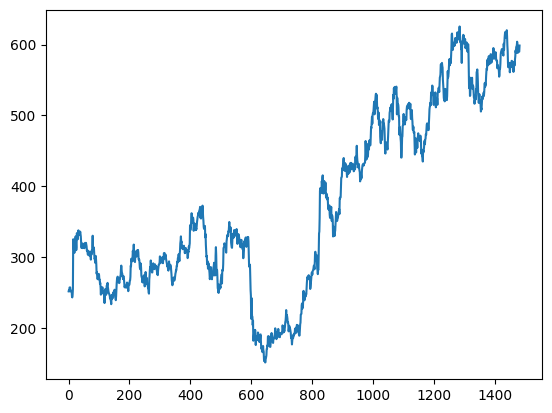

In [21]:
plt.plot(data.Close)

In [22]:
ma100=data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1478    583.326499
1479    583.470499
1480    583.602999
1481    583.666500
1482    583.917000
Name: Close, Length: 1483, dtype: float64

In [23]:
ma200 = data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1478    572.268999
1479    572.196250
1480    572.109750
1481    572.001250
1482    571.911499
Name: Close, Length: 1483, dtype: float64

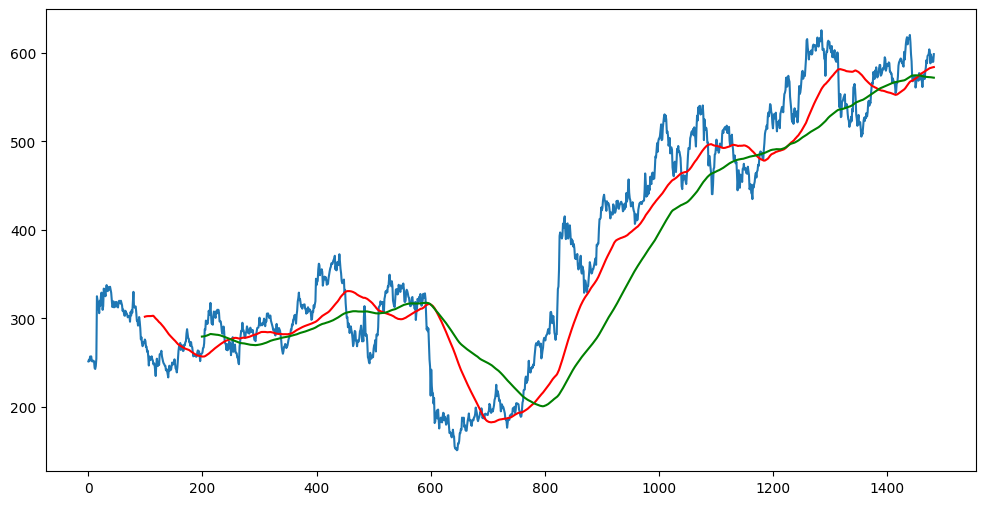

In [24]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

figsize to set the width and height of plot

In [25]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing  = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

print(data_training)
print(data_testing)

           Close
0     251.300003
1     253.199997
2     251.600006
3     256.750000
4     256.850006
...          ...
1033  488.649994
1034  494.700012
1035  487.799988
1036  488.549988
1037  484.799988

[1038 rows x 1 columns]
           Close
1038  481.149994
1039  467.799988
1040  449.200012
1041  446.000000
1042  455.850006
...          ...
1478  594.049988
1479  594.400024
1480  589.750000
1481  589.950012
1482  598.549988

[445 rows x 1 columns]


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.26462064],
       [0.26962589],
       [0.26541095],
       ...,
       [0.88764483],
       [0.88962059],
       [0.87974177]])

In [28]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [29]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential


In [30]:
model = Sequential()

In [31]:
model.add(LSTM(units=50, activation= 'relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu',return_sequences=True,
              ))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu',return_sequences=True,
              ))
model.add(Dropout(0.4))

model.add(LSTM(units=50, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [33]:
# model.compile(optimizer='adam',loss='mean_squared_error')
# model.fit(x_train,y_train,epochs=50)

In [34]:
model.save('keras.model.h5')

C:\Users\TOTAL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
past_100_days = data_training.tail(100)

In [46]:
print(past_100_days)

           Close
938   422.049988
939   428.899994
940   423.299988
941   429.950012
942   425.500000
...          ...
1033  488.649994
1034  494.700012
1035  487.799988
1036  488.549988
1037  484.799988

[100 rows x 1 columns]


In [47]:
data_testing.head()

,Close
1038,481.149994
1039,467.799988
1040,449.200012
1041,446.000000
1042,455.850006


In [59]:
final_df = past_100_days.append(data_testing,ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [57]:
print(final_df)


           Close
1038  481.149994
1039  467.799988
1040  449.200012
1041  446.000000
1042  455.850006
...          ...
1033  488.649994
1034  494.700012
1035  487.799988
1036  488.549988
1037  484.799988

[545 rows x 1 columns]


In [60]:
input_data = scaler.fit_transform(final_df)

In [61]:
input_data

array([[0.34026502],
       [0.27925036],
       [0.19424133],
       [0.17961604],
       [0.22463435],
       [0.25182806],
       [0.2296618 ],
       [0.23468912],
       [0.24908594],
       [0.21800724],
       [0.20566729],
       [0.24565815],
       [0.29296151],
       [0.35100545],
       [0.39168184],
       [0.38848265],
       [0.38642593],
       [0.44309866],
       [0.45361063],
       [0.47326322],
       [0.47829068],
       [0.46457952],
       [0.49040217],
       [0.45749534],
       [0.4986288 ],
       [0.47851914],
       [0.43875688],
       [0.39968001],
       [0.49337303],
       [0.55872946],
       [0.53359235],
       [0.60146244],
       [0.57404014],
       [0.60831802],
       [0.60968908],
       [0.56489937],
       [0.57838206],
       [0.56969822],
       [0.58752283],
       [0.61174581],
       [0.56170005],
       [0.4328153 ],
       [0.53976226],
       [0.50274226],
       [0.48560332],
       [0.49634361],
       [0.48057587],
       [0.419

In [62]:
input_data.shape

(545, 1)

In [63]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [64]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(445, 100, 1)
(445,)


In [65]:
y_predicted = model.predict(x_test)

14/14 [==============================] - 3s 99ms/step


In [66]:
y_predicted.shape

(445, 1)

In [67]:
y_test

array([0.173446  , 0.2207495 , 0.27696517, 0.23446065, 0.18647162,
       0.25457031, 0.24771474, 0.25297065, 0.21663618, 0.28427781,
       0.28450641, 0.31032906, 0.28062156, 0.28153555, 0.28861973,
       0.26416815, 0.2605119 , 0.2591407 , 0.29524671, 0.27536565,
       0.25205666, 0.17893051, 0.18921388, 0.20406763, 0.15950638,
       0.15676412, 0.12797076, 0.20132537, 0.18715715, 0.20429609,
       0.21732171, 0.24908594, 0.26302555, 0.2394881 , 0.27056666,
       0.27490858, 0.30507314, 0.29913156, 0.33478064, 0.3658592 ,
       0.37408583, 0.37248631, 0.35763256, 0.3647166 , 0.33203838,
       0.33089579, 0.382084  , 0.41704756, 0.46572212, 0.48148986,
       0.48903111, 0.50776957, 0.4913163 , 0.55530168, 0.57472581,
       0.55598707, 0.58066725, 0.61882985, 0.61311687, 0.57838206,
       0.56832716, 0.51965274, 0.49360149, 0.5395338 , 0.56672764,
       0.54501831, 0.55507321, 0.5742686 , 0.51942399, 0.47806207,
       0.52650831, 0.51462515, 0.51965274, 0.53519187, 0.49428

In [68]:
y_predicted

array([[0.00722995],
       [0.0070648 ],
       [0.00687866],
       [0.00667856],
       [0.00647004],
       [0.00625472],
       [0.00603847],
       [0.00582714],
       [0.00562568],
       [0.00543543],
       [0.00526076],
       [0.00510549],
       [0.00497518],
       [0.00487143],
       [0.00479189],
       [0.00473376],
       [0.0046921 ],
       [0.00466179],
       [0.00463855],
       [0.00462197],
       [0.00461091],
       [0.00460252],
       [0.00458888],
       [0.00456373],
       [0.00452541],
       [0.00447179],
       [0.00440194],
       [0.00431447],
       [0.00421491],
       [0.00410958],
       [0.00400436],
       [0.00390488],
       [0.00381765],
       [0.00374885],
       [0.00370013],
       [0.00367255],
       [0.00366569],
       [0.00367981],
       [0.00371404],
       [0.00376854],
       [0.00384461],
       [0.00394259],
       [0.0040608 ],
       [0.00419489],
       [0.00434006],
       [0.00448934],
       [0.00463609],
       [0.004

In [69]:
scaler.scale_

array([0.00457038])

In [70]:
scale_factor = 1/0.00457038
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

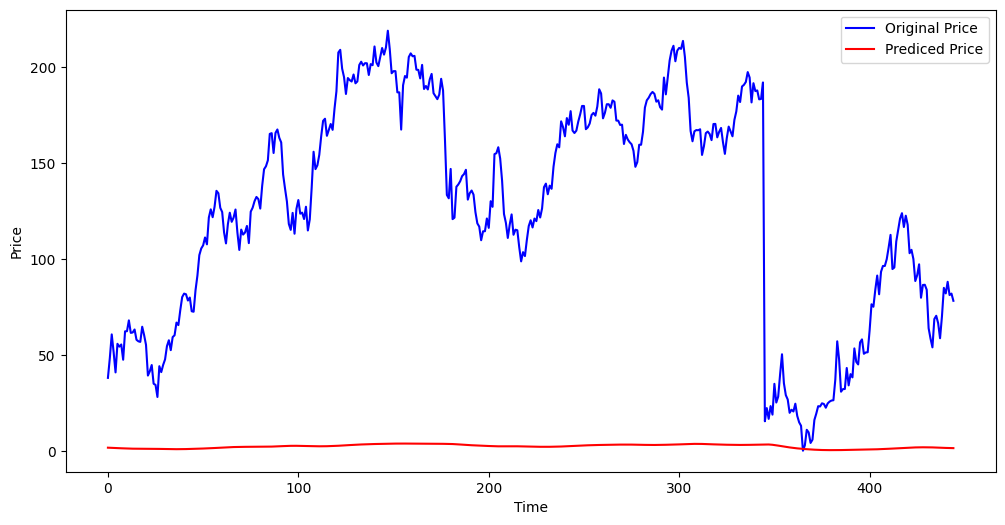

In [71]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Prediced Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [72]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/d6/1f/d3b33ca37a147a428581ec8b4834e63cb6f3e7116acf4e2e10f851f45a97/streamlit-1.27.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/f2/b4/02a0221bd1da91f6e6acdf0525528db24b4b326a670a9048da474dfe0667/altair-5.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for click<9,>=7.0 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow>=6.0 from https://files.pythonhosted.org/packages/0e/2b/328c405ad7897db16f04c4998a3d514e5c311053a8dbf9cf575e4b3ff549/pyarrow-13.0.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/be/2a/4e62ff633612f746f88618852a626bbe24226eba5e7ac90e91dcfd6a414e/r

In [73]:
import streamlit as st